Week 5: Playing with MNIST
==================



Let&rsquo;s load the previously trained MNIST model and summarize it.



In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
import canvas

model = keras.models.load_model('./models/basic_mnist.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

Let&rsquo;s test the model and let&rsquo;s classify an image of a number



/Users/colormotor/opt/miniconda3/lib/python3.10/site-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


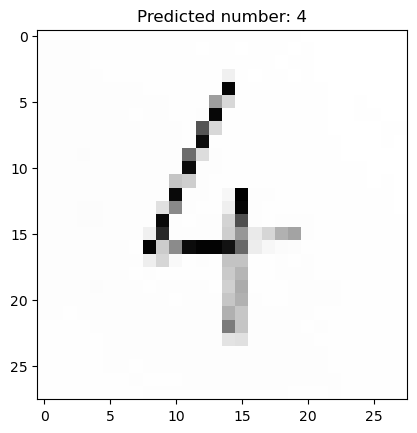

In [3]:
img = image.load_img('images/4.png', target_size=(28, 28), grayscale=True)
# input to the model
x = 1.0 - image.img_to_array(img)/255
# The input to the model needs to have an additional dimension
# Think of this as a list of images, so we can predict multiple instances
x = np.expand_dims(x, 0)
predictions = model.predict(x, verbose=False)
predicted = np.argmax(predictions[0])
canvas.show_image(img, title='Predicted number: ' + str(predicted), cmap='gray')

Here we are using the `image` submodule of `tensorflow.keras.preprocessing` to load an image, resize it to a desired `target_size` and convert it to grayscale. Note that the original image is black on a white background, but MNIST is trained on images of white digits on a black background and in a range between `0` and `1`.
So the line `1.0 - image.img_to_array(img)/255` takes care of normalizing our input that is in the `0` to `255` range and inverting it by subtracting it from `1`.

Now, the assignment consists of two tasks. The first one is to ****disrupt**** an initially correct prediction of a number. The second is to ****generate**** an image that may or may not be recognizable to us as a number, but generates a prediction for a given number.



## Disrupt



Here we provide you with a canvas object that generates images with a number. As it is, this will always produce a correct prediction:



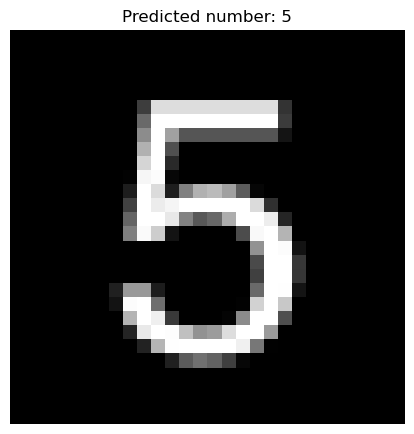

In [4]:
import canvas
from importlib import reload
reload(canvas)
# Generate a random number between 0 and 9 (the max is excluded)
number = np.random.randint(0, 10) 
c = canvas.Canvas(28, 28)
c.background(0)
c.fill(255)
c.text_size(26)
c.text([c.width/2, c.height/2 + 9], str(number), center=True)
im = c.get_image_grayscale()
predictions = model.predict(im.reshape(1, 28, 28, 1), verbose=False)
# Get the index in the array with highest confidence, that will be our predicted number
predicted = np.argmax(predictions[0])
c.show(title='Predicted number: ' + str(predicted), size=(512, 512))

Again, here we are drawing white on black, because this is how MNIST is trained. We can do the opposite by inverting the image with `1.0 - c.get_image_grayscale()`:



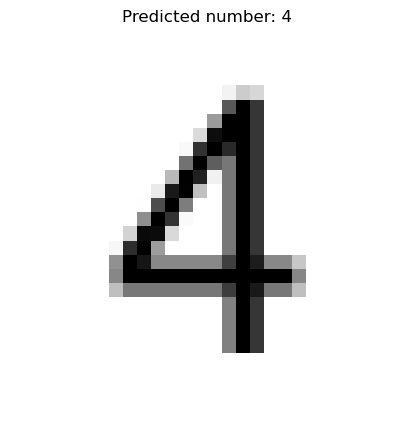

In [5]:
number = np.random.randint(0, 10)
c = canvas.Canvas(28, 28)
c.background(255)
c.fill(0)
c.text_size(26)
c.text([c.width/2, c.height/2 + 9], str(number), center=True)
img = 1.0 - c.get_image_grayscale() # Inverted
predictions = model.predict(img.reshape(1, 28, 28, 1), verbose=False)
# Get the index in the array with highest confidence, that will be our predicted number
predicted = np.argmax(predictions[0])
c.show(title='Predicted number: ' + str(predicted), size=(512, 512))

Note that `c.get_image_grayscale()` gives us back an array already in the `[0, 1]` range, so we do not need to divide it by `255` as in the image example.

Now to the task:

-   Creatively disrupt the image, keeping it recognizable to a human, but causing the model to produce an incorrect prediction.
-   Try to do this in steps, e.g. incrementally adding modifications to the image and observing when and how it stops being recongized by the model.
-   Briefly discuss the steps you are taking, taking advantage of the hybrid markdown/code format of the notebook.

You may want to work with the `Canvas` object directly, using some tools demonstrated in the relevant notebook, in which case you should keep in mind that you are only producing grayscale images and that the images have size 28x28.

Otherwise you might as well work by preparing images externally (e.g. by hand, or using p5js) and then loading these as we have seen earlier for the image of a &ldquo;four&rdquo;. If you take this approach, make sure you start from an image that is consistently recognizable to a human as a given number and correctly classified by the model as that same number.



## Generate



In this case, your task is to generate at least two (but more is welcome) images that classify as two given numbers. As a simple example, this will always classify as a `0`:



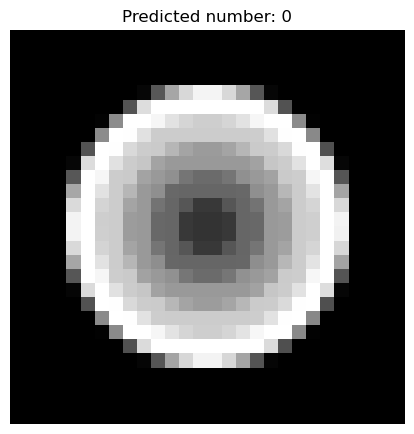

In [6]:
c = canvas.Canvas(28, 28)
c.background(0)

c.no_stroke()
for t in np.linspace(1, 0.2, 5):
    c.fill(255*t)
    c.circle([c.width/2, c.height/2], 10*t)
im = c.get_image_grayscale()
predictions = model.predict(im.reshape(1, 28, 28, 1), verbose=False)
# Get the index in the array with highest confidence, that will be our predicted number
predicted = np.argmax(predictions[0])
c.show(title='Predicted number: ' + str(predicted), size=(512, 512))

Well, we would probably also classify this as a zero. Can you come up with cases where this is not the case?
So now your task is:

-   Creatively generate images that consistently classify to a given number. You are not allowed to use the `text` function in the `Canvas` object as in the previous example.
-   Do this with at least two (or more) numbers and observe how the recognition ability of the model deviates from the one of a human.
-   Briefly discuss your observations and idea by taking advantage of the notebook format.



## Submission instructions



Provide a zip folder containing one or two notebooks together with the `canvas.py` file necessary to run the example and the saved `hd5` MNIST model file. You can submit one notebook for each task or a single notebook with a heading for each task.

The directory structure should look something like this (assuming you have a single notebook)

    - your_submission
    |-- your_notebook.ipynb
    |-- canvas.py
    |-- models
    |   |-- basic_mnist.h5
    |-- data
    |   |-- any additional necessary files

Note that we will need to execute the notebooks to evaluate them, so please make sure to include any external images if you use them. In addition, if you generate images with p5js, make sure you also provide the relevant sketches.

